# **Census Income Predict**

### **Problem Statement**
*  In this project, initially you need to preprocess the data and then develop an
 understanding of the different features of the data by performing exploratory analysis and creating visualizations. Further, after having sufficient knowledge about the attributes, you will perform a predictive task of classification to predict whether an individual makes over 50,000 a year or less by using different machine learning algorithms.

### import the important Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import pickle

In [2]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("scikit-learn", sklearn.__version__)

numpy 1.26.4
pandas 2.2.2
matplotlib 3.9.2
seaborn 0.13.2
scikit-learn 1.5.2


### Load the Dataset

In [3]:
df = pd.read_csv("Datasets/census_income.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Visualise the Dataset

In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Handle Missing Value

In [7]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\Bhautik Gondaliaya\AppData\Local\Temp\ipykernel_15516\2390159178.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
df.duplicated().sum()

24

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
(df == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [11]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [12]:
df.reset_index(drop=True, inplace=True)

### Data Visualization

In [13]:
df['income'].value_counts()

income
<=50K    22633
>50K      7506
Name: count, dtype: int64

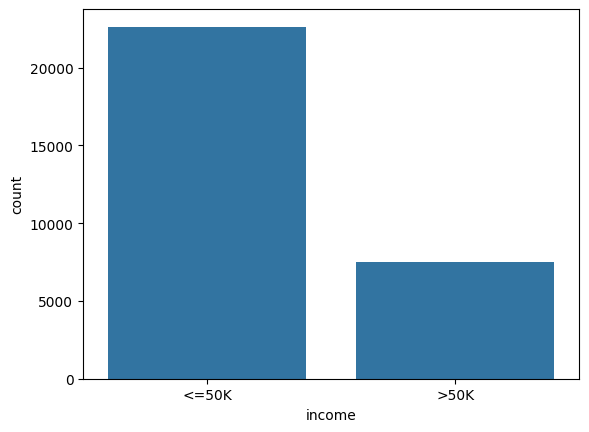

In [14]:
sns.countplot(data=df, x='income')
plt.show()

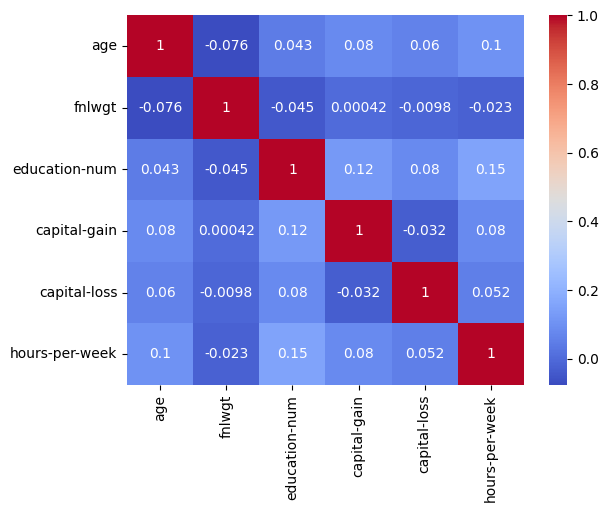

In [15]:
num_list = []
for col in df.columns:
    if df[col].dtype == 'int64':
        num_list.append(col)

sns.heatmap(df[num_list].corr(), annot=True, cmap='coolwarm')
plt.show()

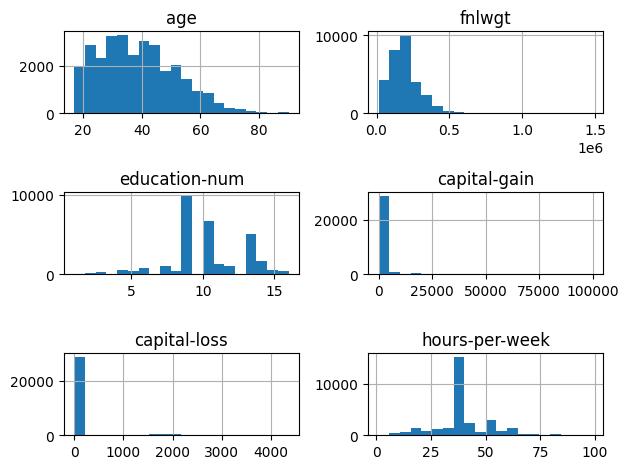

In [16]:
df.hist(bins=20)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [17]:
LE = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

In [18]:
print("Correlation of numerical features with target:")
for col in df.columns:
    if df[col].dtypes == 'int64' or 'int32':
        correlation = df[col].corr(df['income'])
        print(f"{col}: {correlation:.2f}")

Correlation of numerical features with target:
age: 0.24
workclass: 0.02
fnlwgt: -0.01
education: 0.08
education-num: 0.34
marital-status: -0.19
occupation: 0.05
relationship: -0.25
race: 0.07
sex: 0.22
capital-gain: 0.22
capital-loss: 0.15
hours-per-week: 0.23
native-country: 0.02
income: 1.00


In [19]:
df.drop(columns=['fnlwgt', 'marital-status', 'relationship'], inplace=True)

In [20]:
SC = StandardScaler()

numeric_columns = df.select_dtypes(include=['int64', 'int32']).columns

numeric_columns = numeric_columns[numeric_columns != 'income']
SC.fit(df[numeric_columns])
df[numeric_columns] = SC.transform(df[numeric_columns])

In [21]:
x = df.drop(columns=['income'])
y = df['income']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Logistic Regression Model

In [23]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [24]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_lr)*100:.2f}%")
print(f"\nROC-AUC Score: {roc_auc_score(y_test, lr_model.predict_proba(x_test)[:, 1])*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy Score: 81.97%

ROC-AUC Score: 85.49%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4485
           1       0.74      0.45      0.56      1543

    accuracy                           0.82      6028
   macro avg       0.79      0.70      0.72      6028
weighted avg       0.81      0.82      0.80      6028



### Dicision Tree Model

In [25]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [26]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_dt)*100:.2f}%")
print(f"\nROC-AUC Score: {roc_auc_score(y_test, dt_model.predict_proba(x_test)[:, 1])*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy Score: 82.38%

ROC-AUC Score: 84.30%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      4485
           1       0.71      0.53      0.61      1543

    accuracy                           0.82      6028
   macro avg       0.78      0.73      0.75      6028
weighted avg       0.81      0.82      0.82      6028



### Random Forest Model

In [27]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [28]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")
print(f"\nROC-AUC Score: {roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy Score: 82.45%

ROC-AUC Score: 85.30%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      4485
           1       0.69      0.58      0.63      1543

    accuracy                           0.82      6028
   macro avg       0.77      0.74      0.76      6028
weighted avg       0.82      0.82      0.82      6028



### Random Forest Hyperparameter Tuning

In [29]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_tune =  RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_model_tune, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train, y_train)

# Best parameters and score
print("\nBest Parameters for Random Forest:\n", rf_grid_search.best_params_)
print("\nBest Score for Random Forest:\n", rf_grid_search.best_score_)


Best Parameters for Random Forest:
 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Best Score for Random Forest:
 0.8433494610067394


### Comparing Model Performance

In [30]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        "Model": model_name,
        "Accuracy": f"{accuracy_score(y_test, y_pred)*100:.2f}",
        "Precision": f"{precision_score(y_test, y_pred)*100:.2f}",
        "Recall": f"{recall_score(y_test, y_pred)*100:.2f}",
        "F1-Score": f"{f1_score(y_test, y_pred)*100:.2f}",
        "ROC-AUC": f"{roc_auc_score(y_test, y_proba)*100:.2f}"
    }
    return metrics

In [31]:
model_metrics = []

model_metrics.append(evaluate_model(lr_model, x_test, y_test, "Logistic Regression"))
model_metrics.append(evaluate_model(dt_model, x_test, y_test, "Decision Tree"))
model_metrics.append(evaluate_model(rf_model, x_test, y_test, "Random Forest"))
model_metrics.append(evaluate_model(rf_grid_search.best_estimator_, x_test, y_test, "Tuned Random Forest"))

metrics_df = pd.DataFrame(model_metrics)
print(metrics_df)

                 Model Accuracy Precision Recall F1-Score ROC-AUC
0  Logistic Regression    81.97     74.46  44.98    56.08   85.49
1        Decision Tree    82.38     70.64  53.34    60.78   84.30
2        Random Forest    82.45     68.75  57.62    62.69   85.30
3  Tuned Random Forest    84.29     77.59  54.31    63.90   88.63


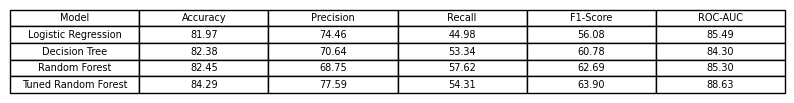

In [37]:
# Create a PNG of the DataFrame
fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

# Save the figure as PNG
output_path = "income_predictor_metrics_df.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# ***Predict Income***

### Create .pkl file

In [34]:
with open('Income_Predictor.pkl', 'wb') as file:
	pickle.dump(rf_grid_search.best_estimator_, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(SC, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(LE, file)